In [14]:
import airfoils as af
import matplotlib.pyplot as plt
import numpy as np
import potential as pot
from wing import Wing

# Airfoil

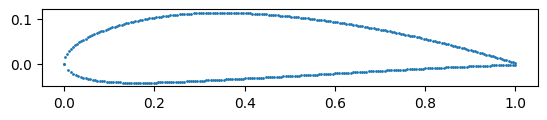

In [15]:
airfoil = af.Airfoil.NACA4("4415", n_points=200)
af_xs, af_ys = airfoil.all_points
plt.scatter(af_xs, af_ys, 1)
plt.axis('scaled')

alpha0 = -4 * np.pi / 180

# Wing Geometry

In [16]:
def linSpan(sp, Ni):
    return np.linspace(0, sp, Ni)

def uniformChord(Ni, ch=1):
    return ch * np.ones(Ni)

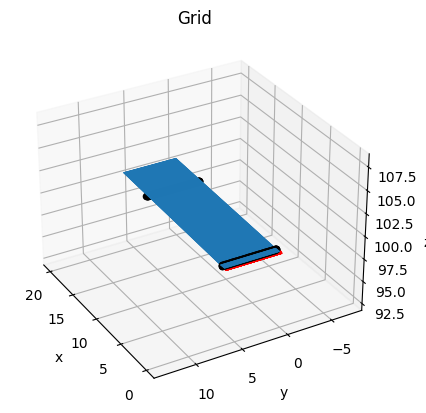

In [17]:
N = 200
M = 3
wg = Wing(
    airfoil=airfoil,
    isSymmetric=True,
    span=6,
    alpha=2,
    beta=0,
    Ni=N,
    Nj=M,
    sweepOffset=0,
    dihAngle=0,
    chordFun=uniformChord,
    spanFun=linSpan,
    ground_clearence = 100
)
wg.plotgrid()

## Wind

In [18]:
Umag = 20
dens = 1.225

# Ground Effect

In [19]:
def ground_effect(x, y, z, i, j, panel):

    U1, U1st = pot.hshoeSL2(x, y, z, i, j, panel)
    U2 , U2st = pot.hshoeSL2(x, y, -z, i, j, panel)

    U_ind = np.array([U1[0] + U2[0],
                      U1[1] + U2[1],
                      U1[2] - U2[2]])
    U_ind_st = np.array([U1st[0] + U2st[0],
                         U1st[1] + U2st[1],
                         U1st[2] - U2st[2]])
    return U_ind , U_ind_st

In [20]:
L_ge, D_ge, Gammas, w_ind = wg.solveWingHS(alpha0, Umag, dens, ground_effect)
print(f"For the whole Wing\nL:{L_ge}\t|\tD:{2*D_ge}")
print(f"CL:{2*L_ge/(dens*(Umag**2)*wg.wingArea)}\t|\tCD_ind:{2*D_ge/(dens*(Umag**2)*wg.wingArea)}")

For the whole Wing
L:700.5925829506829	|	D:36.72769990541189
CL:0.47659359384400185	|	CD_ind:0.012492414933813565


In [21]:
LvsGdist = []
DvsGdist = []
GammavsGdist = []
WindvsGdist = []
groundDist = np.linspace(0.2, 20,20)
for gDist in groundDist:
    wg.set_groundClearence(gDist)
    L , D , Gamma , w = wg.solveWingHS(alpha0,Umag,dens,ground_effect)
    LvsGdist.append(L)
    DvsGdist.append(D)
    GammavsGdist.append(Gamma)
    WindvsGdist.append(w)

/tmp/ipykernel_600823/3320832427.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


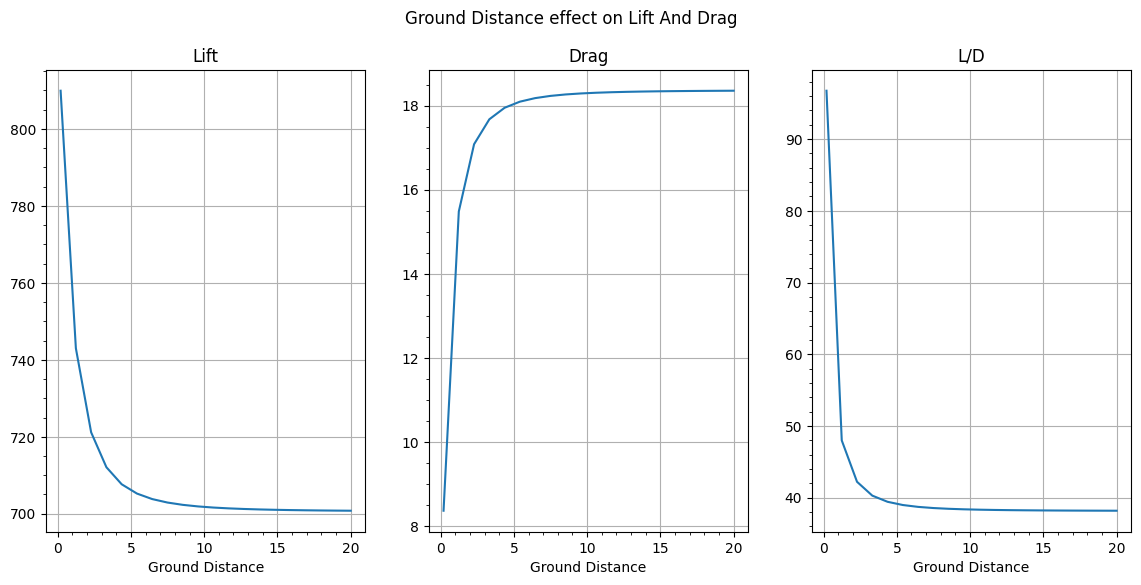

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))
fig.suptitle('Ground Distance effect on Lift And Drag')

ax1.plot(groundDist, LvsGdist)
ax1.set_xlabel("Ground Distance")
ax1.set_title("Lift")
ax1.minorticks_on()
ax1.grid()

ax2.plot(groundDist, DvsGdist)
ax2.set_xlabel("Ground Distance")
ax2.set_title("Drag")
ax2.minorticks_on()
ax2.grid()

ax3.plot(groundDist, np.divide(LvsGdist, DvsGdist))
ax3.set_xlabel("Ground Distance")
ax3.set_title("L/D")
ax3.minorticks_on()
ax3.grid()

fig.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_600823/3675428564.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


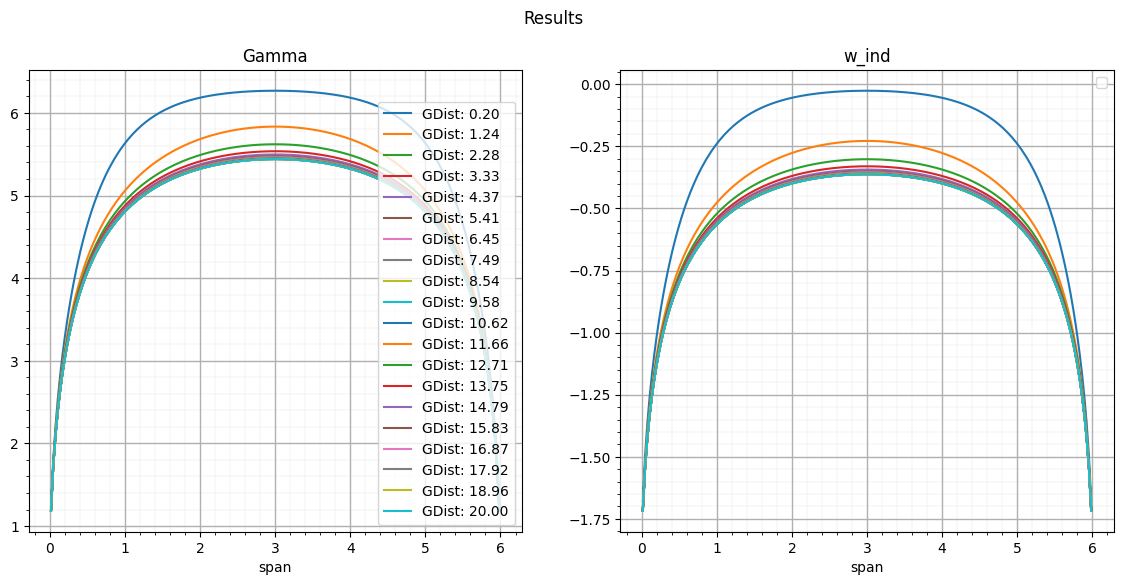

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Results')
for i, offset in enumerate(groundDist):
    ax1.plot((wg.Dspan[1:] + wg.Dspan[:-1])/2,
             GammavsGdist[i], label="GDist: {:.2f}".format(offset))
    ax1.set_xlabel("span")
    ax1.set_title("Gamma")

    # (w_ind/Umag) * 180 / np.pi)
    ax2.plot((wg.Dspan[1:] + wg.Dspan[:-1])/2,
             WindvsGdist[i])
    ax2.set_xlabel("span")
    ax2.set_title("w_ind")
ax1.legend(loc="lower right")
ax1.grid(which='minor', linewidth=0.1)
ax1.grid(which='major', linewidth=1)
ax1.minorticks_on()

ax2.legend(loc="upper right")
ax2.grid(which='minor', linewidth=0.1)
ax2.grid(which='major', linewidth=1)
ax2.minorticks_on()
fig.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_600823/867916210.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


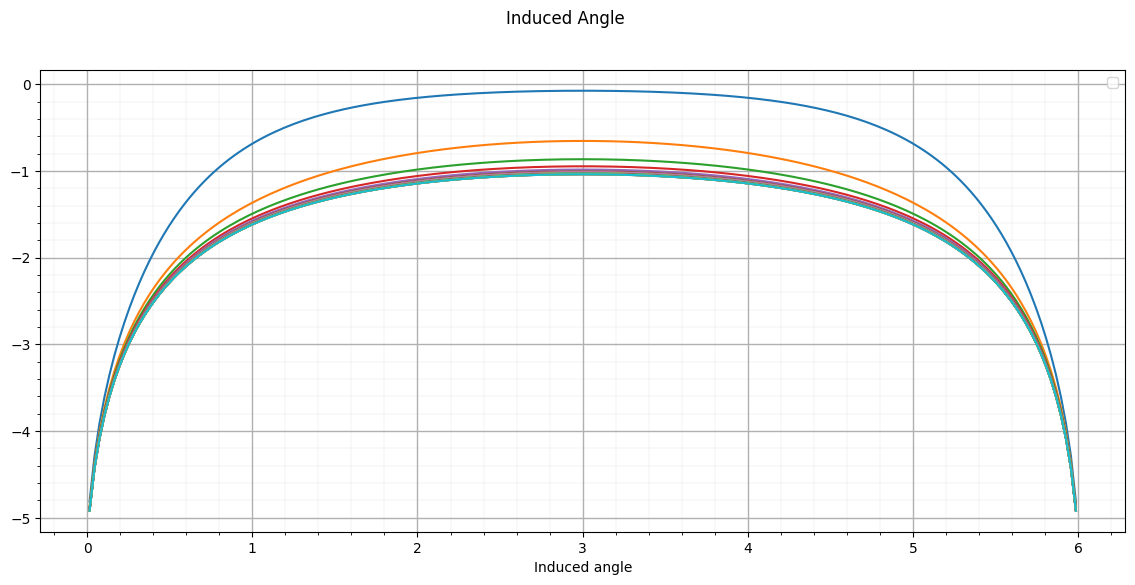

In [33]:
fig, (ax1) = plt.subplots(1, 1, figsize=(14, 6))
fig.suptitle('Induced Angle')
for i, offset in enumerate(groundDist):
    # (w_ind/Umag) * 180 / np.pi)
    ax1.plot((wg.Dspan[1:] + wg.Dspan[:-1])/2, (WindvsGdist[i]/Umag) * 180 / np.pi)
    ax1.set_xlabel("Induced angle")
    # ax1.set_title("w_ind")

ax1.legend(loc="upper right")
ax1.grid(which='minor', linewidth=0.1)
ax1.grid(which='major', linewidth=1)
ax1.minorticks_on()
fig.show()